In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("bollywood.csv")

1. How many records are present in the dataset? Print the metadata information of the dataset.

In [3]:
print("Total records:", len(df))
print("\nMetadata Info:")
print(df.info())

Total records: 149

Metadata Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB
None


2. How many movies got released in each genre? Which genre had highest number of releases? Sort number of releases in each genre in descending order. 

In [4]:
genre_counts = df['Genre'].value_counts()
print("\nMovies released per genre:\n", genre_counts)
print("\nGenre with highest releases:", genre_counts.idxmax())
print("\nSorted Genre Counts (Descending):\n", genre_counts.sort_values(ascending=False))


Movies released per genre:
 Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: count, dtype: int64

Genre with highest releases: Comedy

Sorted Genre Counts (Descending):
 Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: count, dtype: int64


3. How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.) 

In [5]:
genre_release_time_ct = pd.crosstab(df['Genre'], df['ReleaseTime'])
print("\nCross-tabulation between Genre and ReleaseTime:\n", genre_release_time_ct)


Cross-tabulation between Genre and ReleaseTime:
 ReleaseTime  FS  HS  LW   N
Genre                      
Action        3   3   3  15
Comedy        3   5   5  23
Drama         4   6   1  24
Romance       3   3   4  15
Thriller      4   1   2  22


4. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.) 

In [6]:
df['Release Date'] = pd.to_datetime(df['Release Date'], format="%d-%b-%y")
df['Month'] = df['Release Date'].dt.month_name()
month_counts = df['Month'].value_counts()
print("\nMovie releases per month:\n", month_counts)
print("\nMonth with most movie releases:", month_counts.idxmax())


Movie releases per month:
 Month
January      20
March        19
May          18
July         16
February     16
April        11
September    10
June         10
November     10
October       9
August        8
December      2
Name: count, dtype: int64

Month with most movie releases: January


5. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more? 

In [7]:
high_budget = df[df['Budget'] >= 25]
high_budget_month_counts = high_budget['Month'].value_counts()
print("\nHigh-budget movie releases per month:\n", high_budget_month_counts)
print("\nMonth with most high-budget releases:", high_budget_month_counts.idxmax())


High-budget movie releases per month:
 Month
February     9
January      8
March        7
August       7
November     6
July         6
September    5
June         5
April        4
October      4
May          3
December     2
Name: count, dtype: int64

Month with most high-budget releases: February


6. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget. 



In [8]:
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']
top_10_roi = df.sort_values(by='ROI', ascending=False)[['MovieName', 'ROI']].head(10)
print("\nTop 10 movies by ROI:\n", top_10_roi)


Top 10 movies by ROI:
                      MovieName       ROI
64                  Aashiqui 2  8.166667
89                          PK  7.647059
132                Grand Masti  7.514286
135               The Lunchbox  7.500000
87                      Fukrey  6.240000
58                    Mary Kom  5.933333
128                     Shahid  5.666667
37   Humpty Sharma Ki Dulhania  5.500000
101         Bhaag Milkha Bhaag  4.466667
115            Chennai Express  4.266667


7. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the  average ROI for different release times. 

In [9]:
avg_roi_by_time = df.groupby('ReleaseTime')['ROI'].mean().sort_values(ascending=False)
print("\nAverage ROI by ReleaseTime:\n", avg_roi_by_time)


Average ROI by ReleaseTime:
 ReleaseTime
LW    1.127205
FS    0.973853
HS    0.850867
N     0.657722
Name: ROI, dtype: float64


8. Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot  to conclude if the most movies are high or low budgeted movies. 

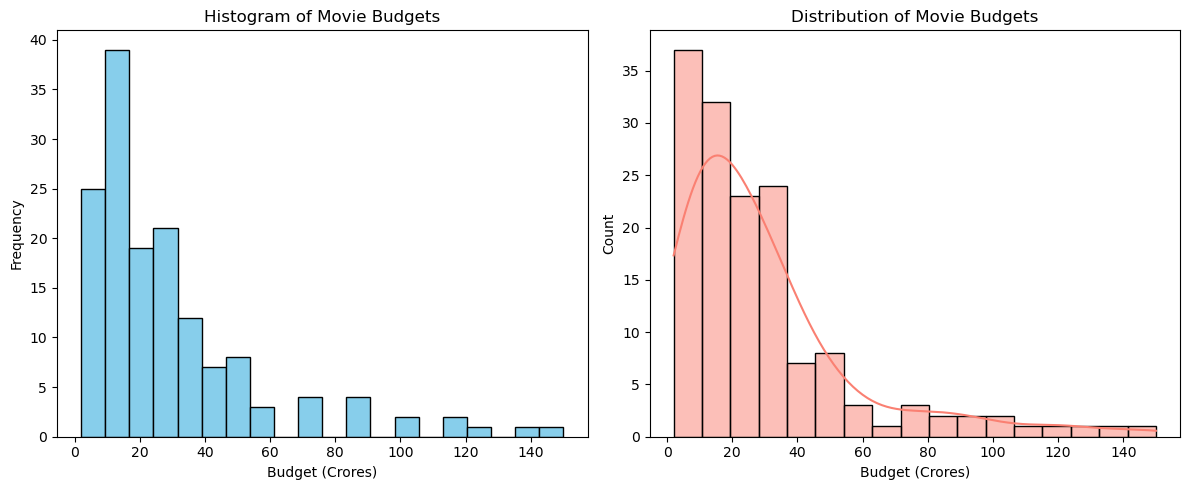

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Budget'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Movie Budgets")
plt.xlabel("Budget (Crores)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(df['Budget'], kde=True, color='salmon')
plt.title("Distribution of Movie Budgets")
plt.xlabel("Budget (Crores)")
plt.tight_layout()
plt.show()

9. Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs? 

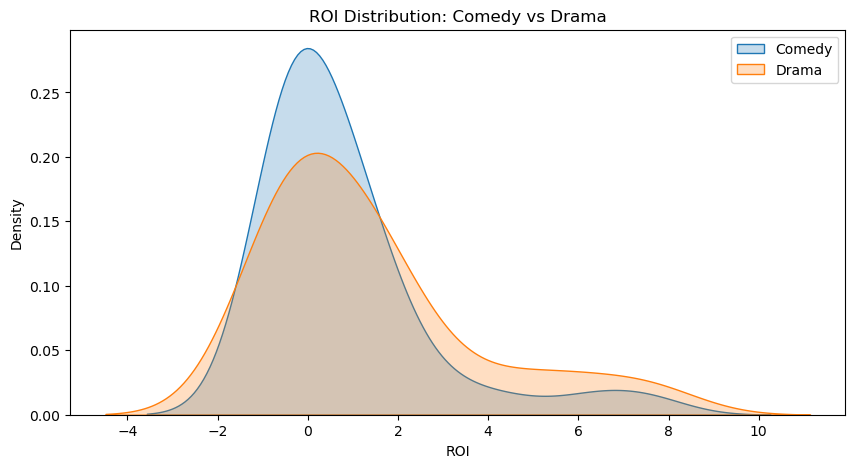

In [17]:
comedy_roi = df[df['Genre'] == 'Comedy']['ROI']
drama_roi = df[df['Genre'] == 'Drama']['ROI']

plt.figure(figsize=(10, 5))
sns.kdeplot(comedy_roi, label='Comedy', fill=True)
sns.kdeplot(drama_roi, label='Drama', fill=True)
plt.title("ROI Distribution: Comedy vs Drama")
plt.xlabel("ROI")
plt.legend()
plt.show()

10. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative? 

In [14]:
correlation = df['BoxOfficeCollection'].corr(df['YoutubeLikes'])
print("\nCorrelation between Box Office Collection and YouTube Likes:", correlation)


Correlation between Box Office Collection and YouTube Likes: 0.6825165877731297


11. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare. 

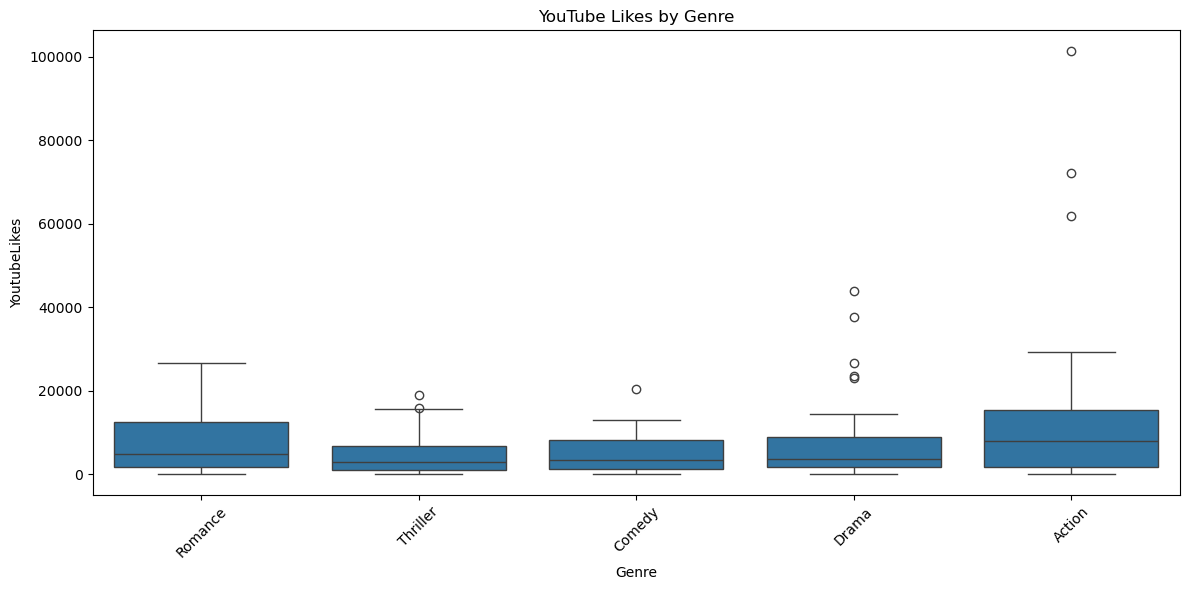

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Genre', y='YoutubeLikes')
plt.xticks(rotation=45)
plt.title("YouTube Likes by Genre")
plt.tight_layout()
plt.show()

12. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or

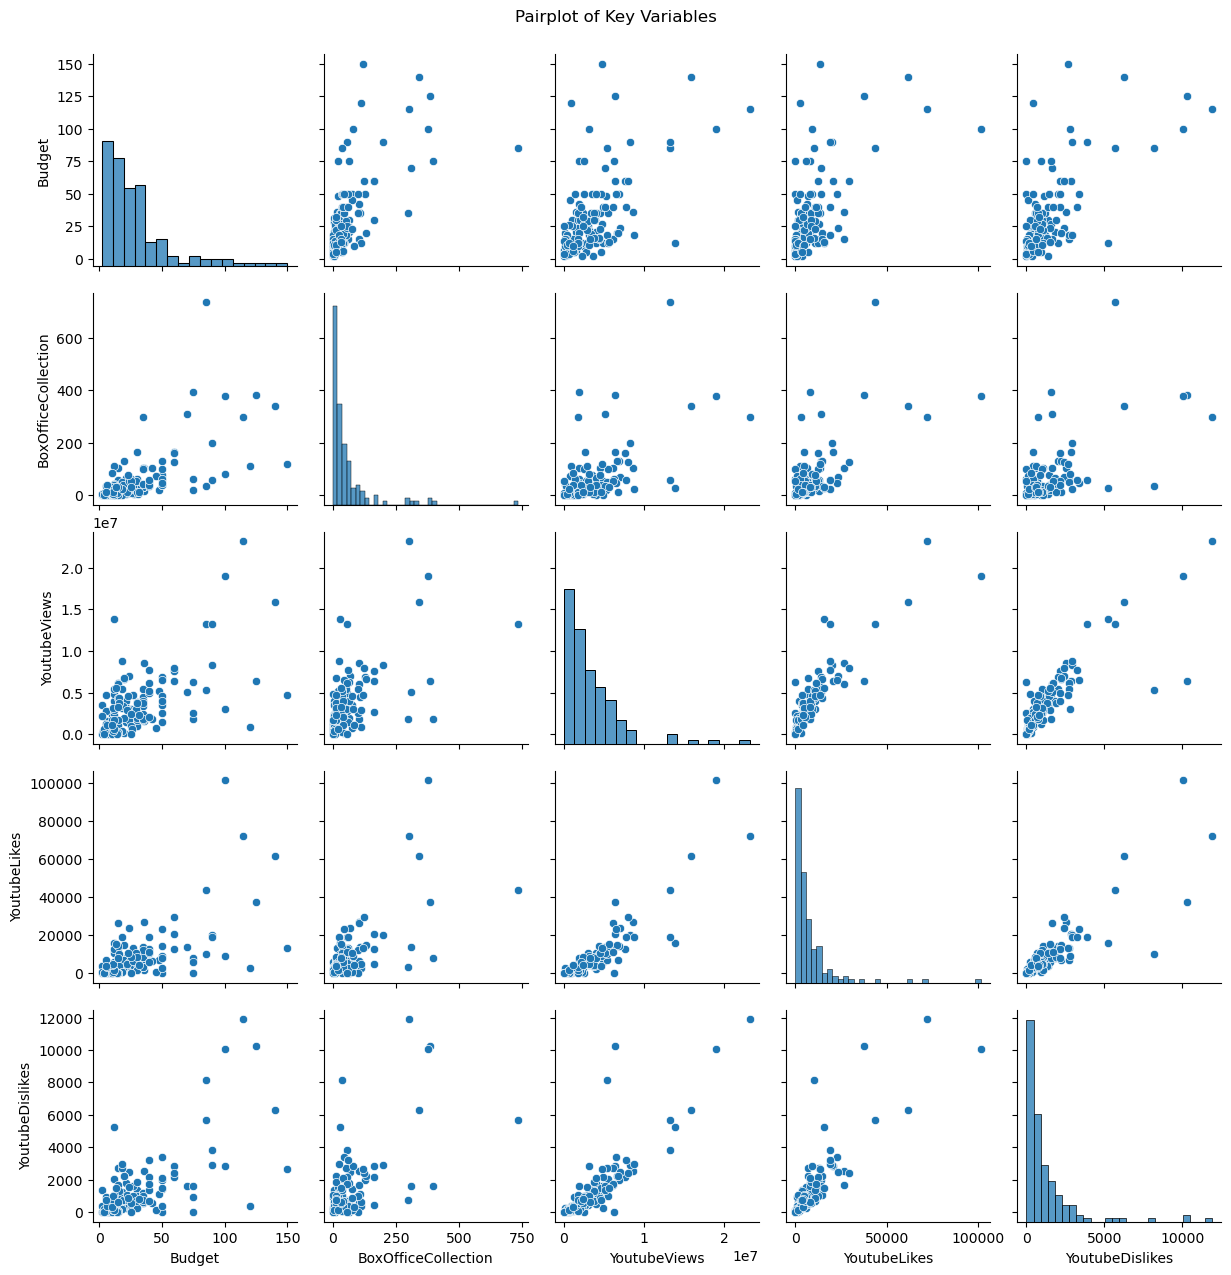

In [16]:
selected_vars = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']
sns.pairplot(df[selected_vars])
plt.suptitle("Pairplot of Key Variables", y=1.02)
plt.show()